## Задача: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

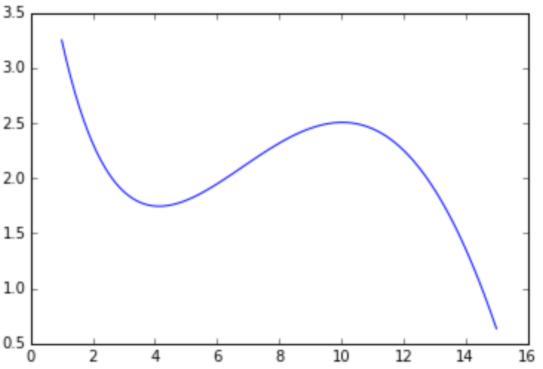

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

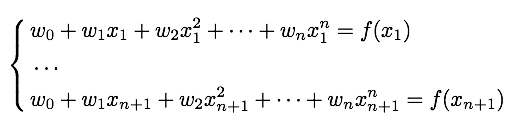

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством и будем находить приближение функции многочленом, решая систему линейных уравнений.

Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42).
Отправьте ответ, разделив числа (w_0, w_1, w_2, w_3) пробелами.

In [62]:
import numpy as np
x1, x2, x3, x4 = 1., 4., 10., 15.
x = np.array([1., 4., 10., 15.])
M = len(x)

In [67]:
#Запишем мат.функцию:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

Сформулируем систему линейных уравнений:

In [64]:
A = [] # Матрица (левая часть системы)
for j in x:
    podlis= []
    for nb in range(M):
        podlis.append(float(j**nb))
    A.append(podlis)
print (A)

[[1.0, 1.0, 1.0, 1.0], [1.0, 4.0, 16.0, 64.0], [1.0, 10.0, 100.0, 1000.0], [1.0, 15.0, 225.0, 3375.0]]


In [65]:
b = [] # Вектор (правая часть системы) 
for i in x: 
    b.append(f(i))
print (b)

[3.252216865271419, 1.7468459495903677, 2.5054164070002463, 0.6352214195786656]


In [60]:
#Найдем коэффициенты данного многочлена:
print (*np.linalg.solve(A,b))

4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552


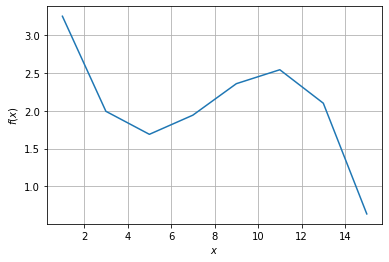

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
c = [4.362641535118072, -1.2955258656948436, 0.1933368470215116, -0.008235651173320552]

def f(x, c):
    return c[0]+c[1]*x+c[2]*x**2+c[3]*x**3

x=numpy.arange(1,16,2) #Массив значений аргумента
plt.plot(x, f(x, c)) #Построение графика
plt.xlabel(r'$x$') #Метка по оси x в формате TeX
plt.ylabel(r'$f(x)$') #Метка по оси y в формате TeX
plt.grid(True) #Сетка
plt.show() #Показать график